In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings 
import seaborn as sns
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("D:/Projects/mlproject/notebook/data/StudentsPerformance.csv")

In [4]:
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.shape

(1000, 8)

In [6]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [7]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [10]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [11]:
print("Categories in 'gender' variable:    ",end=" ")
print(df['gender'].unique())

print("Categories in 'race/ethnicity' variable:    ",end=" ")
print(df['race/ethnicity'].unique())

print("Categories in 'parental level of education' variable:    ",end=" ")
print(df['parental level of education'].unique())

print("Categories in 'lunch' variable:    ",end=" ")
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:    ",end=" ")
print(df['test preparation course'].unique())


Categories in 'gender' variable:     ['female' 'male']
Categories in 'race/ethnicity' variable:     ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable:     ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:     ['standard' 'free/reduced']
Categories in 'test preparation course' variable:     ['none' 'completed']


In [12]:
## Defining Numerical and Categorical Features
numerical_features = [feature for feature in df.columns if df[feature].dtype!='O']## !='O' then it is numerical Feature definition
categorical_features = [feature for feature in df.columns if df[feature].dtype=='O']## =='O then it is categorical Feature Definition
print("We Have",len(numerical_features),"numerical_features",numerical_features)
print("We Have",len(categorical_features),"categorical_features",categorical_features)
## Where O is Object

We Have 3 numerical_features ['math score', 'reading score', 'writing score']
We Have 5 categorical_features ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [13]:
## Creating Total Score Feature and Average feature
df['total_score'] = df['math score']+df['reading score']+df['writing score']
df['Average'] = df['total_score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [14]:
reading_full = df[df['reading score'] == 100]['Average'].count()
maths_full = df[df['math score'] == 100]['Average'].count()
writing_full = df[df['writing score'] == 100]['Average'].count()
print("No of Students who got full marks in reading are",reading_full)
print("No of Students who got full marks in Maths are",maths_full)
print("No of Students who got full marks in writing are",writing_full)

No of Students who got full marks in reading are 17
No of Students who got full marks in Maths are 7
No of Students who got full marks in writing are 14


In [15]:
reading_less_20 = df[df['reading score'] <= 20]['Average'].count()
maths_less_20 = df[df['math score'] <= 20]['Average'].count()
writing_less_20 = df[df['writing score'] <= 20]['Average'].count()
print("No of Students who got less than 20  marks in reading are",reading_less_20)
print("No of Students who got less than 20 marks in Maths are",maths_less_20)
print("No of Students who got less than 20 marks in writing are",writing_less_20)

No of Students who got less than 20  marks in reading are 1
No of Students who got less than 20 marks in Maths are 4
No of Students who got less than 20 marks in writing are 3


## Insights 
### From the above section we can understand students performed less in maths and performed well in reading 

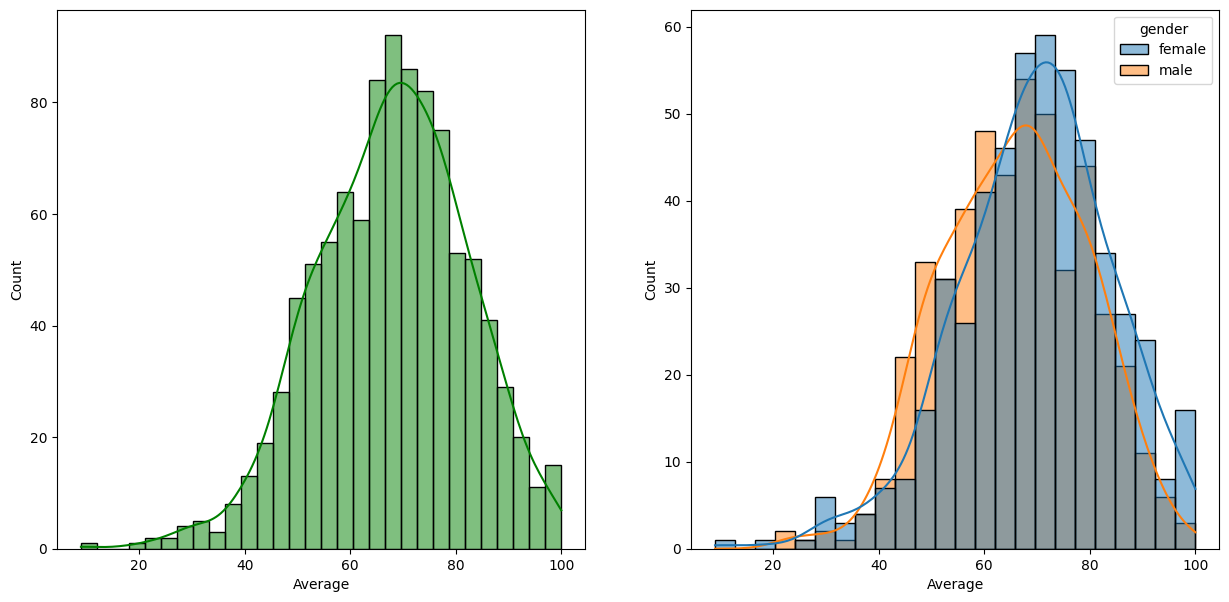

In [16]:
## EDA Visualization
fig,axes = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='Average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Average',kde=True,hue='gender')
plt.show()

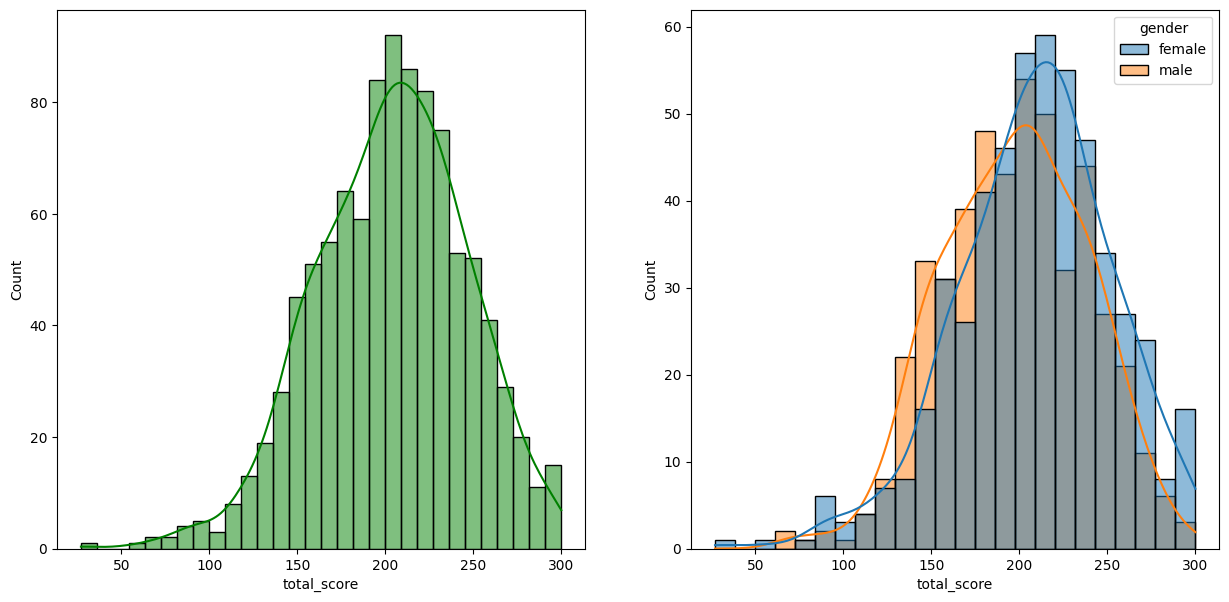

In [17]:
fig,axes = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='total_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total_score',kde=True,hue='gender')
plt.show()